# Task 4

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer
import tensorflow as tf
import os
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import LabelEncoder

In [5]:
#Reading the dataset
#i have marged the part 1 and part 2 of the HAM10000_images.
root = 'HAM10000_images'
image_filenames=[]
images = []

for file_name in os.listdir('./HAM10000_images'):
    img = plt.imread(os.path.join(root, file_name))
    images.append(img.flatten())  # Flatten image into a 1D array
    image_filenames.append(file_name.split('.')[0])

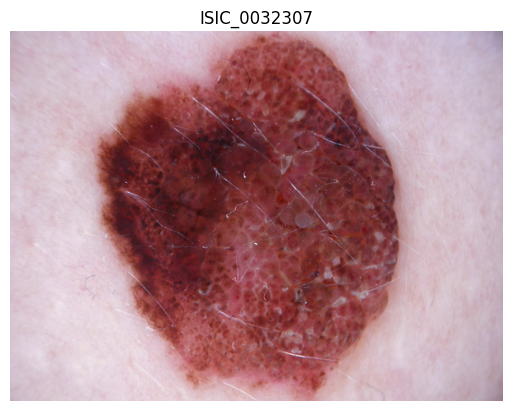

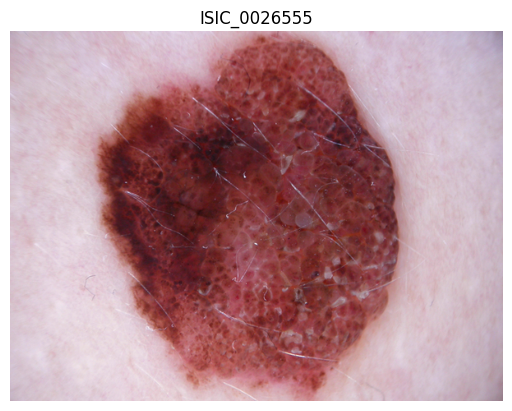

In [6]:
import random

# Display a random sample of images
sample_size = 2  # You can change this to display a different number of images

# Randomly select sample images
sample_images = random.sample(image_filenames, sample_size)

# Loop through and display the sample images
for filename in sample_images:
    file_path = os.path.join(root,file_name)
    image = Image.open(file_path)
    plt.imshow(image)
    plt.title(filename)
    plt.axis('off')
    plt.show()

In [7]:
image_filenames

['ISIC_0024306',
 'ISIC_0024307',
 'ISIC_0024308',
 'ISIC_0024309',
 'ISIC_0024310',
 'ISIC_0024311',
 'ISIC_0024312',
 'ISIC_0024313',
 'ISIC_0024314',
 'ISIC_0024315',
 'ISIC_0024316',
 'ISIC_0024317',
 'ISIC_0024318',
 'ISIC_0024319',
 'ISIC_0024320',
 'ISIC_0024321',
 'ISIC_0024322',
 'ISIC_0024323',
 'ISIC_0024324',
 'ISIC_0024325',
 'ISIC_0024326',
 'ISIC_0024327',
 'ISIC_0024328',
 'ISIC_0024329',
 'ISIC_0024330',
 'ISIC_0024331',
 'ISIC_0024332',
 'ISIC_0024333',
 'ISIC_0024334',
 'ISIC_0024335',
 'ISIC_0024336',
 'ISIC_0024337',
 'ISIC_0024338',
 'ISIC_0024339',
 'ISIC_0024340',
 'ISIC_0024341',
 'ISIC_0024342',
 'ISIC_0024343',
 'ISIC_0024344',
 'ISIC_0024345',
 'ISIC_0024346',
 'ISIC_0024347',
 'ISIC_0024348',
 'ISIC_0024349',
 'ISIC_0024350',
 'ISIC_0024351',
 'ISIC_0024352',
 'ISIC_0024353',
 'ISIC_0024354',
 'ISIC_0024355',
 'ISIC_0024356',
 'ISIC_0024357',
 'ISIC_0024358',
 'ISIC_0024359',
 'ISIC_0024360',
 'ISIC_0024361',
 'ISIC_0024362',
 'ISIC_0024363',
 'ISIC_0024364

In [9]:
#total samples
len(image_filenames)

10015

In [10]:
df=pd.read_csv('HAM10000_metadata.csv')

In [11]:
fnames = df['image_id']
labels_unordered = df['dx']

In [12]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [13]:
labels = [None]*(len(labels_unordered))

In [14]:

for i in range(0,len(image_filenames)):
    
    for j in range(0,len(fnames)):
        
        if image_filenames[i] == fnames[j]:
            labels[i] = labels_unordered[j]
        

In [15]:
labels

['nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'bkl',
 'mel',
 'nv',
 'mel',
 'nv',
 'nv',
 'df',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'akiec',
 'df',
 'bcc',
 'bcc',
 'mel',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'nv',
 'vasc',
 'bkl',
 'akiec',
 'nv',
 'nv',
 'vasc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'bkl',
 'nv',
 'nv',
 'df',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'df',
 'nv',
 'nv',
 'nv',
 'mel',
 'nv',
 'vasc',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'bkl',
 'bkl',
 'mel',
 'bcc',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv',
 'akiec',
 'nv',
 'bkl',
 'nv',
 'bkl',
 'nv',
 'nv',
 'nv',
 'bkl',
 'nv',
 'nv',
 'nv',
 'nv',
 'bcc',
 'bcc',
 'nv',
 'nv',
 'bkl',
 'bcc',
 'nv',
 'nv',
 'nv',
 'nv',
 'nv'

In [16]:
# Sample data with string labels
labels
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on your labels and transform the labels into numerical values
numeric_labels = label_encoder.fit_transform(labels)

# Display the mapping between original labels and numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Print the converted numerical labels
print("Numeric Labels:", numeric_labels)

Label Mapping: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
Numeric Labels: [5 5 5 ... 2 5 5]


In [17]:
#This is the x and y calculated the length of both.
x = images   #these are the input images.
y = numeric_labels #these are the labels against images.
len(x),len(y)

(10015, 10015)

In [18]:
numeric_labels[:5]

array([5, 5, 5, 5, 4], dtype=int64)

# Train_test Data_Split

In [19]:
#Setting up the random state
np.random.seed(42)

# Splitting the data into initial training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

print(f"This is the initial training data division: ({len(X_train)}, {len(Y_train)})")
print(f"This is the initial test data division: ({len(X_test)}, {len(Y_test)})")

# Now, let's create a training subset from the initial training data
train_subset_size = 0.7  # Adjust this value as needed
X_train_subset, _, Y_train_subset, _ = train_test_split(X_train, Y_train, train_size=train_subset_size, random_state=42)

print(f"This is the training subset division: ({len(X_train_subset)}, {len(Y_train_subset)})")

# Convert to NumPy arrays

X_train_subset = np.array(X_train_subset)
Y_train_subset = np.array(Y_train_subset)


This is the initial training data division: (8012, 8012)
This is the initial test data division: (2003, 2003)
This is the training subset division: (5608, 5608)


# Fitting the Model on Data

In [20]:
#Shifting my String data of labels into the numeric form

In [21]:
# Create MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_subset.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')  # 15 output classes for 15 subjects
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_subset, Y_train_subset, epochs=15, batch_size=32, validation_split=0.2)

train_loss, train_accuracy = model.evaluate(X_train_subset, Y_train_subset)

print(f'Training accuracy: {train_accuracy * 100:.2f}%')


Epoch 1/15
141/141 [==============================] - 142s 982ms/step - loss: 17644.6797 - accuracy: 0.5276 - val_loss: 4639.0557 - val_accuracy: 0.3654
Epoch 2/15
141/141 [==============================] - 135s 955ms/step - loss: 5615.0181 - accuracy: 0.5361 - val_loss: 4446.9546 - val_accuracy: 0.6381
Epoch 3/15
141/141 [==============================] - 133s 946ms/step - loss: 3330.9558 - accuracy: 0.5430 - val_loss: 1616.8086 - val_accuracy: 0.6230
Epoch 4/15
141/141 [==============================] - 134s 948ms/step - loss: 2325.9111 - accuracy: 0.5444 - val_loss: 1682.8417 - val_accuracy: 0.6078
Epoch 5/15
141/141 [==============================] - 134s 948ms/step - loss: 1297.8047 - accuracy: 0.5504 - val_loss: 897.7045 - val_accuracy: 0.6640
Epoch 6/15
141/141 [==============================] - 136s 964ms/step - loss: 1793.0852 - accuracy: 0.5504 - val_loss: 1398.2609 - val_accuracy: 0.6658
Epoch 7/15
141/141 [==============================] - 135s 956ms/step - loss: 1028.9788 

In [22]:
# #MLP
# model = Sequential([
#     Dense(128, input_dim=5608, activation='relu'),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Create a KerasClassifier for use with GridSearchCV
# keras_classifier = KerasClassifier(build_fn=lambda: model, epochs=10, batch_size=32, verbose=0)

# # Define the hyperparameters to search
# param_grid = {
#     'optimizer': ['adam', 'sgd'],
#     'activation': ['relu', 'tanh'],
#     'dropout_rate': [0.0, 0.2, 0.5],
#     'neurons': [64, 128, 256]
# }

# # Create the GridSearchCV instance
# grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# # Fit the grid search to your training data
# grid_search.fit(X_train_subset,Y_train_subset)  # Replace X_train and y_train with your training data

# # Print the best hyperparameters and corresponding accuracy
# print("Best Accuracy: %.2f%%" % (grid_search.best_score_ * 100))
# print("Best Parameters: ", grid_search.best_params_)


# Testing the Model

In [24]:
# Test the model
X_test_Shape1 = np.array(X_test)
y_pred = model.predict(X_test_Shape1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1-score
precision = precision_score(Y_test, y_pred_classes, average='macro')
recall = recall_score(Y_test, y_pred_classes, average='macro')
f1 = f1_score(Y_test, y_pred_classes, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

63/63 [==============================] - 13s 80ms/step
Precision: 0.10
Recall: 0.14
F1-score: 0.11


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
